In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#load data
df = pd.read_excel("2020W3.xlsx", sheet_name='Sheet2')

#select only years with male/female split and reduce details
df = df[df["Age bracket"].isin(['4-10 years', '11-18 years', '19-64 years','65 years and over', ])]

#reorganise dataframe
df = pd.melt(df, id_vars=["Age bracket", "Group", "Gender"], var_name="Year", value_name="Percent")

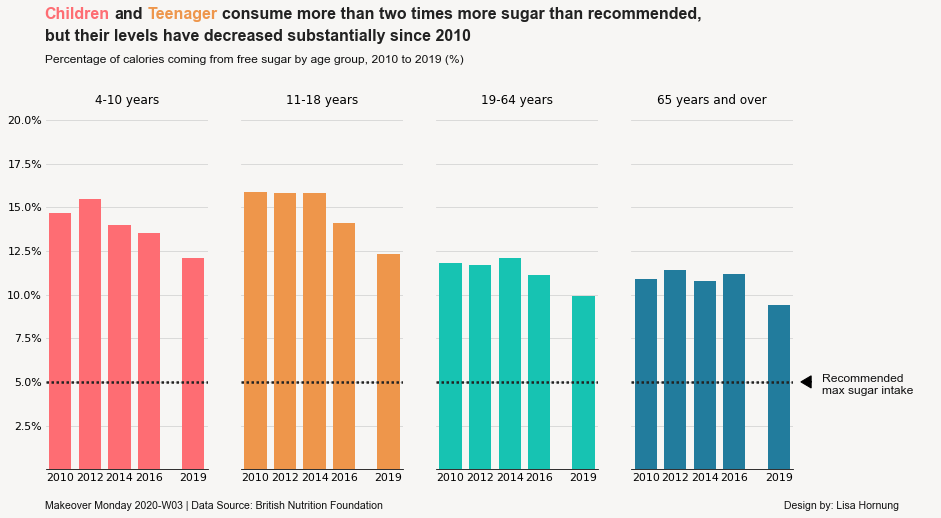

In [130]:
gender = ["All", "Female", "Male"]
cols = {"All": "#333333", "Female": "orange", "Male": "blue", "benchmark": "#222222",
       "4-10 years": "#fe6d73", "11-18 years":"#ee964b" , "19-64 years": "#17c3b2",
        "65 years and over":"#227c9d" }
date_names = [2010, 2012, 2014, 2016, 2019]

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(13,5))
fig.set_facecolor("#f7f6f4")
#fig.set_facecolor("#fef9ef")
plt.subplots_adjust(left=0.001, bottom=0.01, right=0.8, top=0.98, wspace=0.2, hspace=0.3)

# =======
#plot data for each age bracket
num=0
for i in df["Age bracket"].unique():
    num+=1
    plt.subplot(1,4,num)
    
    ####plot data
    #all
    plt.bar(date_names, df[(df["Age bracket"]==i) & (df["Gender"]==gender[0])]["Percent"],
            color=cols[i], width=1.5, zorder=2)
    
    #remove grid
    for pos in ['right', 'top',  'left']:
        plt.gca().spines[pos].set_visible(False)
    plt.gca().patch.set_alpha(0) 
    
    #x-axis
    plt.xticks([2009,2010, 2012, 2014, 2016, 2019], ["",2010, 2012, 2014, 2016, 2019])
    plt.gca().set_xlim(xmin=2009, xmax=2020)
    
    #yaxis
    plt.gca().set_ylim(ymin=0, ymax=20)
    if num==1:
        plt.yticks([2.5,5,7.5,10,12.5,15,17.5,20])
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}%'))
    else:
        plt.yticks([2.5,5,7.5,10,12.5,15,17.5,20], ["", "", "", "","", "", "", ""])
    plt.grid(visible=True, axis='y', zorder=1, color = "#D3D3D3")
    
    plt.tick_params(axis='both', length = 0, color = "#444444", labelsize=11)
    
    
    #recommended intake line
    plt.plot([2009, 2020], [5,5],linestyle= (0,(1, 1)), linewidth=2.5, color=cols["benchmark"])
    
    #title
    plt.title(i, y=1.03,ha='center', fontsize=12, fontweight=1.5)

#=========
#add annotation
plt.arrow(2021, 5, -0.5,0, head_width=0.7, head_length=0.7, length_includes_head=True, color='black',
             zorder=4, clip_on = False)
plt.figtext(0.83,.22, "Recommended\nmax sugar intake", fontsize=12,
            ha='left', color="#111111", fontfamily="Arial")

#title
plt.figtext(0,1.26,'Children',
         fontsize = 16, weight = 'bold', fontfamily='Arial', color=cols["4-10 years"])
plt.figtext(0.075,1.26,'and',
         fontsize = 16, weight = 'bold', fontfamily='Arial', color="#222222")
plt.figtext(0.11,1.26,'Teenager',
         fontsize = 16, weight = 'bold', fontfamily='Arial', color=cols["11-18 years"])
plt.figtext(0.19,1.26,'consume more than two times more sugar than recommended,',
         fontsize = 16, weight = 'bold', fontfamily='Arial', color="#222222")
plt.figtext(0,1.2,'but their levels have decreased substantially since 2010',
         fontsize = 16, weight = 'bold', fontfamily='Arial', color="#222222")
plt.figtext(0,1.14, "Percentage of calories coming from free sugar by age group, 2010 to 2019 (%)", 
            fontsize=12, ha='left',  color="#111111", fontfamily="Arial")

#footer
plt.figtext(0,-0.1, "Makeover Monday 2020-W03 | Data Source: British Nutrition Foundation", fontsize=10.5,
            ha='left', color="#111111", fontfamily="Arial")
plt.figtext(0.95,-0.1, "Design by: Lisa Hornung            ",
            fontsize=10.5, ha='right', color="#111111", fontfamily="Arial")

plt.savefig("MakeoverMonday2020W03_sugar-calorie-intake.png", bbox_inches="tight",pad_inches=0.2)

plt.show()

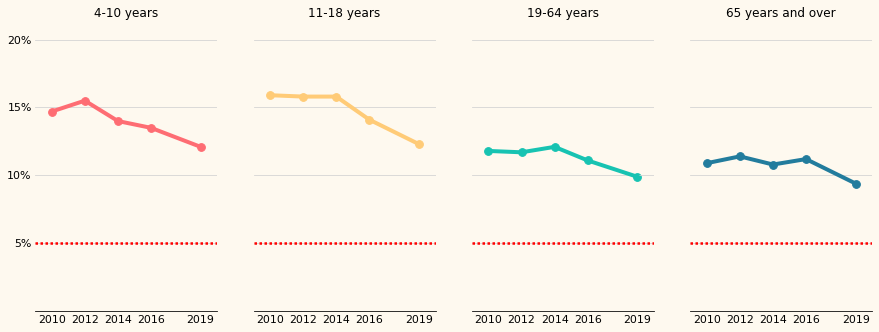

In [16]:
gender = ["All", "Female", "Male"]
cols = {"All": "#333333", "Female": "orange", "Male": "blue", "benchmark": "red",
       "4-10 years": "#fe6d73", "11-18 years":"#ffcb77" , "19-64 years": "#17c3b2",
        "65 years and over":"#227c9d" }
date_names = [2010, 2012, 2014, 2016, 2019]

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(15,5))
fig.set_facecolor("#fef9ef")



# =======
#plot data for each age bracket
num=0
for i in df["Age bracket"].unique():
    num+=1
    plt.subplot(1,4,num)
    
    ####plot data
    #all
    plt.plot(date_names, df[(df["Age bracket"]==i) & (df["Gender"]==gender[0])]["Percent"],
            linewidth=4, color=cols[i])
    plt.scatter(date_names, df[(df["Age bracket"]==i) & (df["Gender"]==gender[0])]["Percent"],
            s=60, color=cols[i])

    
    #remove grid
    for pos in ['right', 'top',  'left']:
        plt.gca().spines[pos].set_visible(False)
    plt.gca().patch.set_alpha(0) #set background as transparent
    
    #x-axis
    plt.xticks([2009,2010, 2012, 2014, 2016, 2019], ["",2010, 2012, 2014, 2016, 2019])
    plt.gca().set_xlim(xmin=2009, xmax=2020)
    
    #yaxis
    plt.gca().set_ylim(ymin=0, ymax=20)
    if num==1:
        plt.yticks([5,10,15,20])
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
    else:
        plt.yticks([5,10,15,20], ["", "", "", ""])
    plt.grid(visible=True, axis='y', zorder=1, color = "#D3D3D3")
    
    plt.tick_params(axis='both', length = 0, color = "#444444", labelsize=11)
    
    
    #recommended intake line
    plt.plot([2009, 2020], [5,5],linestyle= (0,(1, 1)), linewidth=2.5, color=cols["benchmark"])
    
    #title
    plt.title(i, y=1.06,ha='center', fontsize=12)


